In [1]:
##Collecting the data
import os
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv("C:\\Users\\Shreya\\Downloads\\NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Turnover
0,26-09-2022,225.600006,232.699997,223.009995,224.070007,224.070007,8234300
1,27-09-2022,228.630005,230.639999,220.720001,224.360001,224.360001,7762200
2,28-09-2022,229.690002,246.649994,227.380005,245.199997,245.199997,17579700
3,29-09-2022,241.610001,246.979996,235.679993,239.710007,239.710007,18994900
4,30-09-2022,237.000000,242.440002,233.259995,235.440002,235.440002,11848600


In [7]:
df.shape

(251, 7)

In [8]:
df1=df.reset_index()['Close']

In [9]:
df1.head()

0    224.070007
1    224.360001
2    245.199997
3    239.710007
4    235.440002
Name: Close, dtype: float64

In [10]:
df1.shape

(251,)

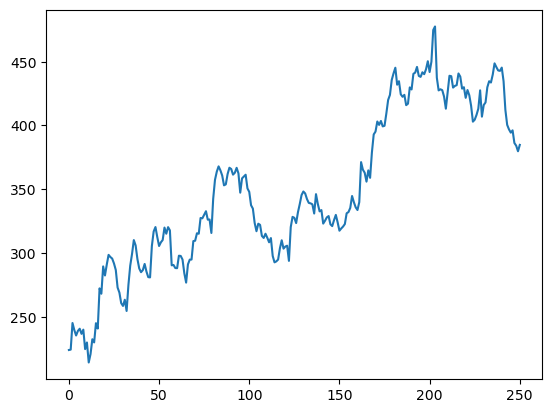

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
#LSTM are sensitive to the scale of data

In [13]:
import numpy as np

In [14]:
df1

0      224.070007
1      224.360001
2      245.199997
3      239.710007
4      235.440002
          ...    
246    396.200012
247    386.299988
248    384.149994
249    379.809998
250    384.799988
Name: Close, Length: 251, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1

array([[0.037144  ],
       [0.03824538],
       [0.11739462],
       [0.09654392],
       [0.08032666],
       [0.09399924],
       [0.1004558 ],
       [0.08522599],
       [0.09772127],
       [0.03972657],
       [0.05958983],
       [0.        ],
       [0.02499051],
       [0.06919864],
       [0.05966581],
       [0.11701486],
       [0.10091154],
       [0.22062291],
       [0.20459556],
       [0.28590966],
       [0.25886828],
       [0.29141662],
       [0.32028105],
       [0.31390052],
       [0.30926702],
       [0.29468291],
       [0.27519942],
       [0.22297762],
       [0.20801369],
       [0.17660469],
       [0.16828717],
       [0.18674515],
       [0.15332325],
       [0.23045958],
       [0.2880365 ],
       [0.3227497 ],
       [0.36426137],
       [0.34838585],
       [0.30759592],
       [0.27987093],
       [0.26874286],
       [0.27497155],
       [0.29323967],
       [0.27060393],
       [0.25400691],
       [0.25320926],
       [0.3465249 ],
       [0.389

In [21]:
##Train -test split is done using cross validation or random seed

In [22]:
training_size=int(len(df1)*0.65)
test_size=len(df1) -training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1), :1]

In [23]:
training_size,test_size

(163, 88)

In [24]:
# Preprocessing to create input-output pairs for an LSTM model

import numpy as np
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [25]:
time_step = 70
X_train, y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(92, 70)
(92,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(17, 70)
(17,)


(None, None)

In [28]:
#3d
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
#create the stacked LSTM model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(70,1))) 
model.add(LSTM(50,return_sequences=True)) 
model.add(LSTM(50)) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
2/2 [==============================] - 14s 3s/step - loss: 0.2233 - val_loss: 0.3551
Epoch 2/50
2/2 [==============================] - 1s 193ms/step - loss: 0.0951 - val_loss: 0.0780
Epoch 3/50
2/2 [==============================] - 0s 169ms/step - loss: 0.0182 - val_loss: 0.0283
Epoch 4/50
2/2 [==============================] - 0s 172ms/step - loss: 0.0363 - val_loss: 0.0165
Epoch 5/50
2/2 [==============================] - 0s 171ms/step - loss: 0.0225 - val_loss: 0.0203
Epoch 6/50
2/2 [==============================] - 0s 180ms/step - loss: 0.0075 - val_loss: 0.0606
Epoch 7/50
2/2 [==============================] - 0s 168ms/step - loss: 0.0128 - val_loss: 0.0854
Epoch 8/50
2/2 [==============================] - 0s 173ms/step - loss: 0.0171 - val_loss: 0.0841
Epoch 9/50
2/2 [==============================] - 0s 168ms/step - loss: 0.0153 - val_loss: 0.0651
Epoch 10/50
2/2 [==============================] - 0s 171ms/step - loss: 0.0102 - val_loss: 0.0408
Epoch 11/50
2/2 [====

In [33]:
tf.__version__

'2.13.0'

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 98ms/step


In [35]:
#transfroming back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
##Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

330.22364301415115

In [37]:
##Test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

366.18795118375095

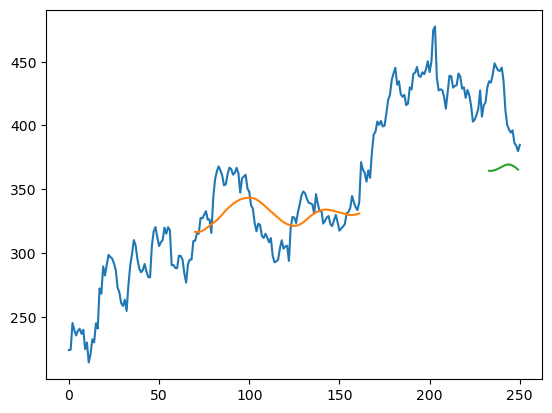

In [45]:
look_back=70
trainPredictPlot =np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np. nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
len(test_data)

88

In [47]:
x_input=test_data[18:].reshape(1,-1)
x_input.shape

(1, 70)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
from numpy import array

# Initialize an empty list for the first output
first_output = []
n_steps=70
i = 0
while(i<18):
    
    if len(temp_input) > 70:
        #print(temp_input)
        x_input=array(temp_input[1:])  # Remove the first element
        print("{} day input: {}".format(i,x_input))
        x_input=x_input.reshape((1,-1))
        x_input=x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output: {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        first_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        first_output.extend(yhat.tolist())
        i = i + 1
        
        
        
print(first_output)


[0.5637667]
71
1 day input: [0.82669957 0.83710603 0.79817705 0.79069508 0.79654384 0.76585646
 0.77018607 0.81864793 0.81257119 0.85909607 0.86270416 0.87964299
 0.85282947 0.85001903 0.86372957 0.85803264 0.87261676 0.89665784
 0.86448921 0.89540445 0.98940369 1.         0.84743645 0.80976075
 0.81306494 0.81052038 0.7914167  0.75533619 0.80322827 0.85332323
 0.85199392 0.81811628 0.82305357 0.82533236 0.86012159 0.85077855
 0.81507785 0.8191797  0.78758074 0.81082417 0.79532859 0.76399551
 0.71671099 0.72252185 0.73680218 0.75533619 0.8099506  0.73163691
 0.76619827 0.7739081  0.8192176  0.83699209 0.83323205 0.85677937
 0.89020128 0.87911133 0.86916073 0.86786932 0.87759206 0.83706801
 0.75180401 0.7071781  0.69369543 0.68404861 0.69088499 0.6532852
 0.64511963 0.62863655 0.64758828 0.56376672]
1 day output: [[0.5581701]]
2 day input: [0.83710603 0.79817705 0.79069508 0.79654384 0.76585646 0.77018607
 0.81864793 0.81257119 0.85909607 0.86270416 0.87964299 0.85282947
 0.85001903 0.8

In [50]:
day_new=np.arange(1,71)
day_pred=np.arange(71,89)

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(df1)-70

181

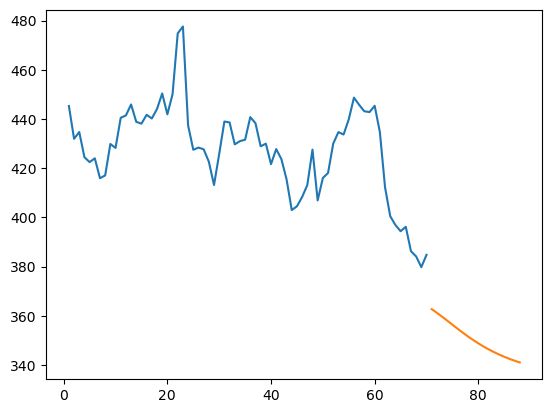

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[181:]))
plt.plot(day_pred,scaler.inverse_transform(first_output))

# This way we can predict stock prices using LSTM